<h1> Importing Libraries used in this project</h1>

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data Preprocessing 

### Training Image Preprocessing

In [5]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'E:\\Sanjeev\\Learnings\\Dataset\\Dataset\\train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    # pad_to_aspect_ratio=False,
    data_format=None,
)

Found 70295 files belonging to 38 classes.


### Valid Image Preprocessing

In [8]:
valid_set=tf.keras.utils.image_dataset_from_directory(
    'E:\\Sanjeev\\Learnings\\Dataset\\Dataset\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    # pad_to_aspect_ratio=False,
    data_format=None,
)

Found 17572 files belonging to 38 classes.


In [8]:
training_set
valid_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [10]:
for x,y in training_set:
    print(x, x.shape)
    break

tf.Tensor(
[[[[ 82.5   87.5  106.5 ]
   [ 82.75  87.75 106.75]
   [ 82.25  87.25 106.25]
   ...
   [142.   147.   167.  ]
   [142.   147.   167.  ]
   [143.5  148.5  168.5 ]]

  [[ 85.    90.   109.  ]
   [ 85.25  90.25 109.25]
   [ 82.    87.   106.  ]
   ...
   [145.   150.   170.  ]
   [145.   150.   170.  ]
   [143.5  148.5  168.5 ]]

  [[ 83.    88.   107.  ]
   [ 86.    91.   110.  ]
   [ 84.75  89.75 108.75]
   ...
   [145.   150.   170.  ]
   [145.   150.   170.  ]
   [143.5  148.5  168.5 ]]

  ...

  [[ 92.5   98.5  120.5 ]
   [ 93.75  99.75 121.75]
   [ 90.    96.   118.  ]
   ...
   [132.25 140.25 163.25]
   [130.75 138.75 161.75]
   [132.5  140.5  163.5 ]]

  [[ 88.5   94.5  116.5 ]
   [ 94.   100.   122.  ]
   [ 93.25  99.25 121.25]
   ...
   [132.5  140.5  163.5 ]
   [130.5  138.5  161.5 ]
   [131.5  139.5  162.5 ]]

  [[ 91.25  97.25 119.25]
   [ 94.75 100.75 122.75]
   [ 94.25 100.25 122.25]
   ...
   [133.5  141.5  164.5 ]
   [129.5  137.5  160.5 ]
   [130.5  138.5  16

# Building Model

In [13]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D,Flatten, Dropout
from tensorflow.keras.models import Sequential

In [15]:
model = Sequential()

### Building Convolution Layer

In [20]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [22]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [24]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [143]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [26]:
model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
model.add(Conv2D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [28]:
model.add(Dropout(0.25))

In [30]:
model.add(Flatten())

In [32]:
model.add(Dense(units=1500, activation='relu'))

In [34]:
model.add(Dropout(0.40))

#### Output Layer

In [37]:
model.add(Dense(units=38, activation='softmax'))


#### Compile the Model

In [40]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 63, 63, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 61, 61, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 14, 14, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 6, 6, 512)           │         590,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,386,186 (24.36 MB)

 Trainable params: 6,386,186 (24.36 MB)

 Non-trainable params: 0 (0.00 B)

## Training model

In [44]:
 training_history= model.fit(x=training_set,validation_data=valid_set,epochs=2)

Epoch 1/2
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2088s 946ms/step - accuracy: 0.3936 - loss: 2.1745 - val_accuracy: 0.8221 - val_loss: 0.5797
Epoch 2/2
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1939s 883ms/step - accuracy: 0.8178 - loss: 0.5758 - val_accuracy: 0.8882 - val_loss: 0.3499


# Evaluation of Model


In [50]:
train_loss, train_acc= model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 588s 268ms/step - accuracy: 0.9028 - loss: 0.3092


In [52]:
print(train_loss, train_acc)

0.2857621908187866 0.9106622338294983


In [58]:
val_loss, val_acc = model.evaluate(valid_set)
print('Validation accuracy:', val_acc, val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 260s 472ms/step - accuracy: 0.8853 - loss: 0.3556
Validation accuracy: 0.8882312774658203 0.8882312774658203


# Save The Model

In [64]:
model.save("E:\\Sanjeev\\Learnings\\Projects\\ML\\Plant Disease Detection\\Trained_model.keras")

In [66]:
training_history.history

{'accuracy': [0.5883206725120544, 0.8431894183158875],
 'loss': [1.3988748788833618, 0.49538078904151917],
 'val_accuracy': [0.8221033215522766, 0.8882312774658203],
 'val_loss': [0.579655647277832, 0.34986504912376404]}

## Recording The history 

In [70]:
import json
with open("E:\\Sanjeev\\Learnings\\Projects\\ML\\Plant Disease Detection\\training_history.json","w") as H:
    json.dump(training_history.history,H)
    

## Accuracy Visualization

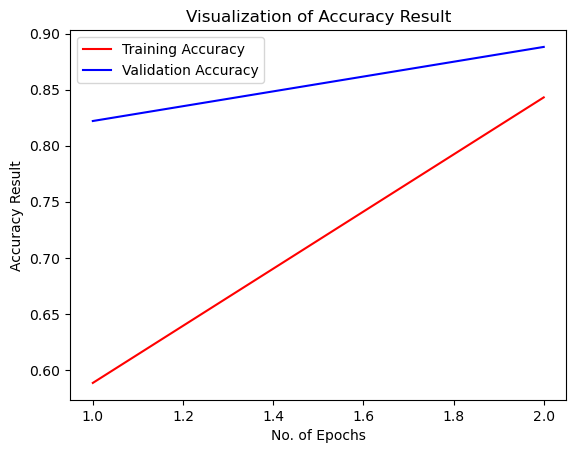

In [89]:
epochs = [i for i in range(1,3)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.ylabel("Accuracy Result")
plt.title('Visualization of Accuracy Result') 
plt.legend()
plt.show()

## Other Matrixes to evaluate Visualization 

In [98]:
class_name=valid_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [100]:
testing_set = tf.keras.utils.image_dataset_from_directory(
    'E:\\Sanjeev\\Learnings\\Dataset\\Dataset\\valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [106]:
y_pred=model.predict(testing_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 285s 518ms/step


(array([[9.9440479e-01, 2.5937795e-03, 6.3675230e-07, ..., 1.6891821e-08,
         2.3193643e-09, 3.7516628e-08],
        [9.5098507e-01, 1.5311380e-03, 2.0251355e-06, ..., 3.5737753e-07,
         3.7300911e-08, 1.1467284e-06],
        [9.9962068e-01, 4.8559301e-05, 3.0542039e-06, ..., 1.2981578e-08,
         1.6958569e-09, 1.0334218e-07],
        ...,
        [2.3416651e-04, 9.6541775e-08, 8.3825289e-06, ..., 2.5470488e-06,
         1.1750009e-06, 9.9305081e-01],
        [8.8258821e-04, 9.2704448e-07, 1.0334198e-04, ..., 1.4225938e-05,
         1.0215259e-05, 9.9613804e-01],
        [7.8252533e-08, 6.3246053e-09, 2.7482940e-09, ..., 2.2896103e-10,
         1.5986811e-07, 9.9994123e-01]], dtype=float32),
 (17572, 38))

In [108]:
predicted_categories = tf.argmax(y_pred, axis=1)
predicted_categories


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [114]:
true_categories = tf.concat([y for x, y in testing_set], axis=0)
true_categories


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [116]:
Y_true = tf.argmax(true_categories, axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [118]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.77      0.88      0.82       504
                                 Apple___Black_rot       0.93      0.88      0.91       497
                          Apple___Cedar_apple_rust       0.94      0.91      0.93       440
                                   Apple___healthy       0.79      0.90      0.84       502
                               Blueberry___healthy       0.84      0.94      0.89       454
          Cherry_(including_sour)___Powdery_mildew       0.94      0.92      0.93       421
                 Cherry_(including_sour)___healthy       0.98      0.91      0.94       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.83      0.92      0.87       410
                       Corn_(maize)___Common_rust_       0.98      0.96      0.97       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.85      0.

In [120]:
cm = confusion_matrix(Y_true,predicted_categories)

In [124]:
cm.shape

(38, 38)

<Axes: >

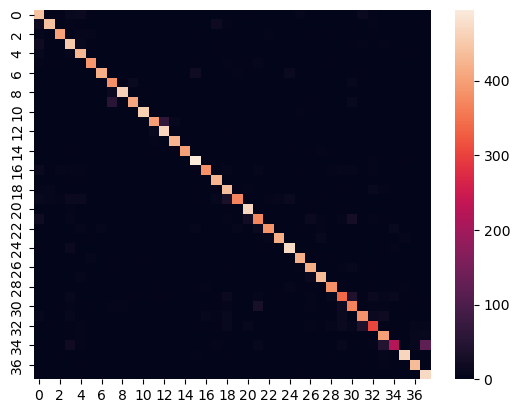

In [131]:
sns.heatmap(cm)

<Axes: >

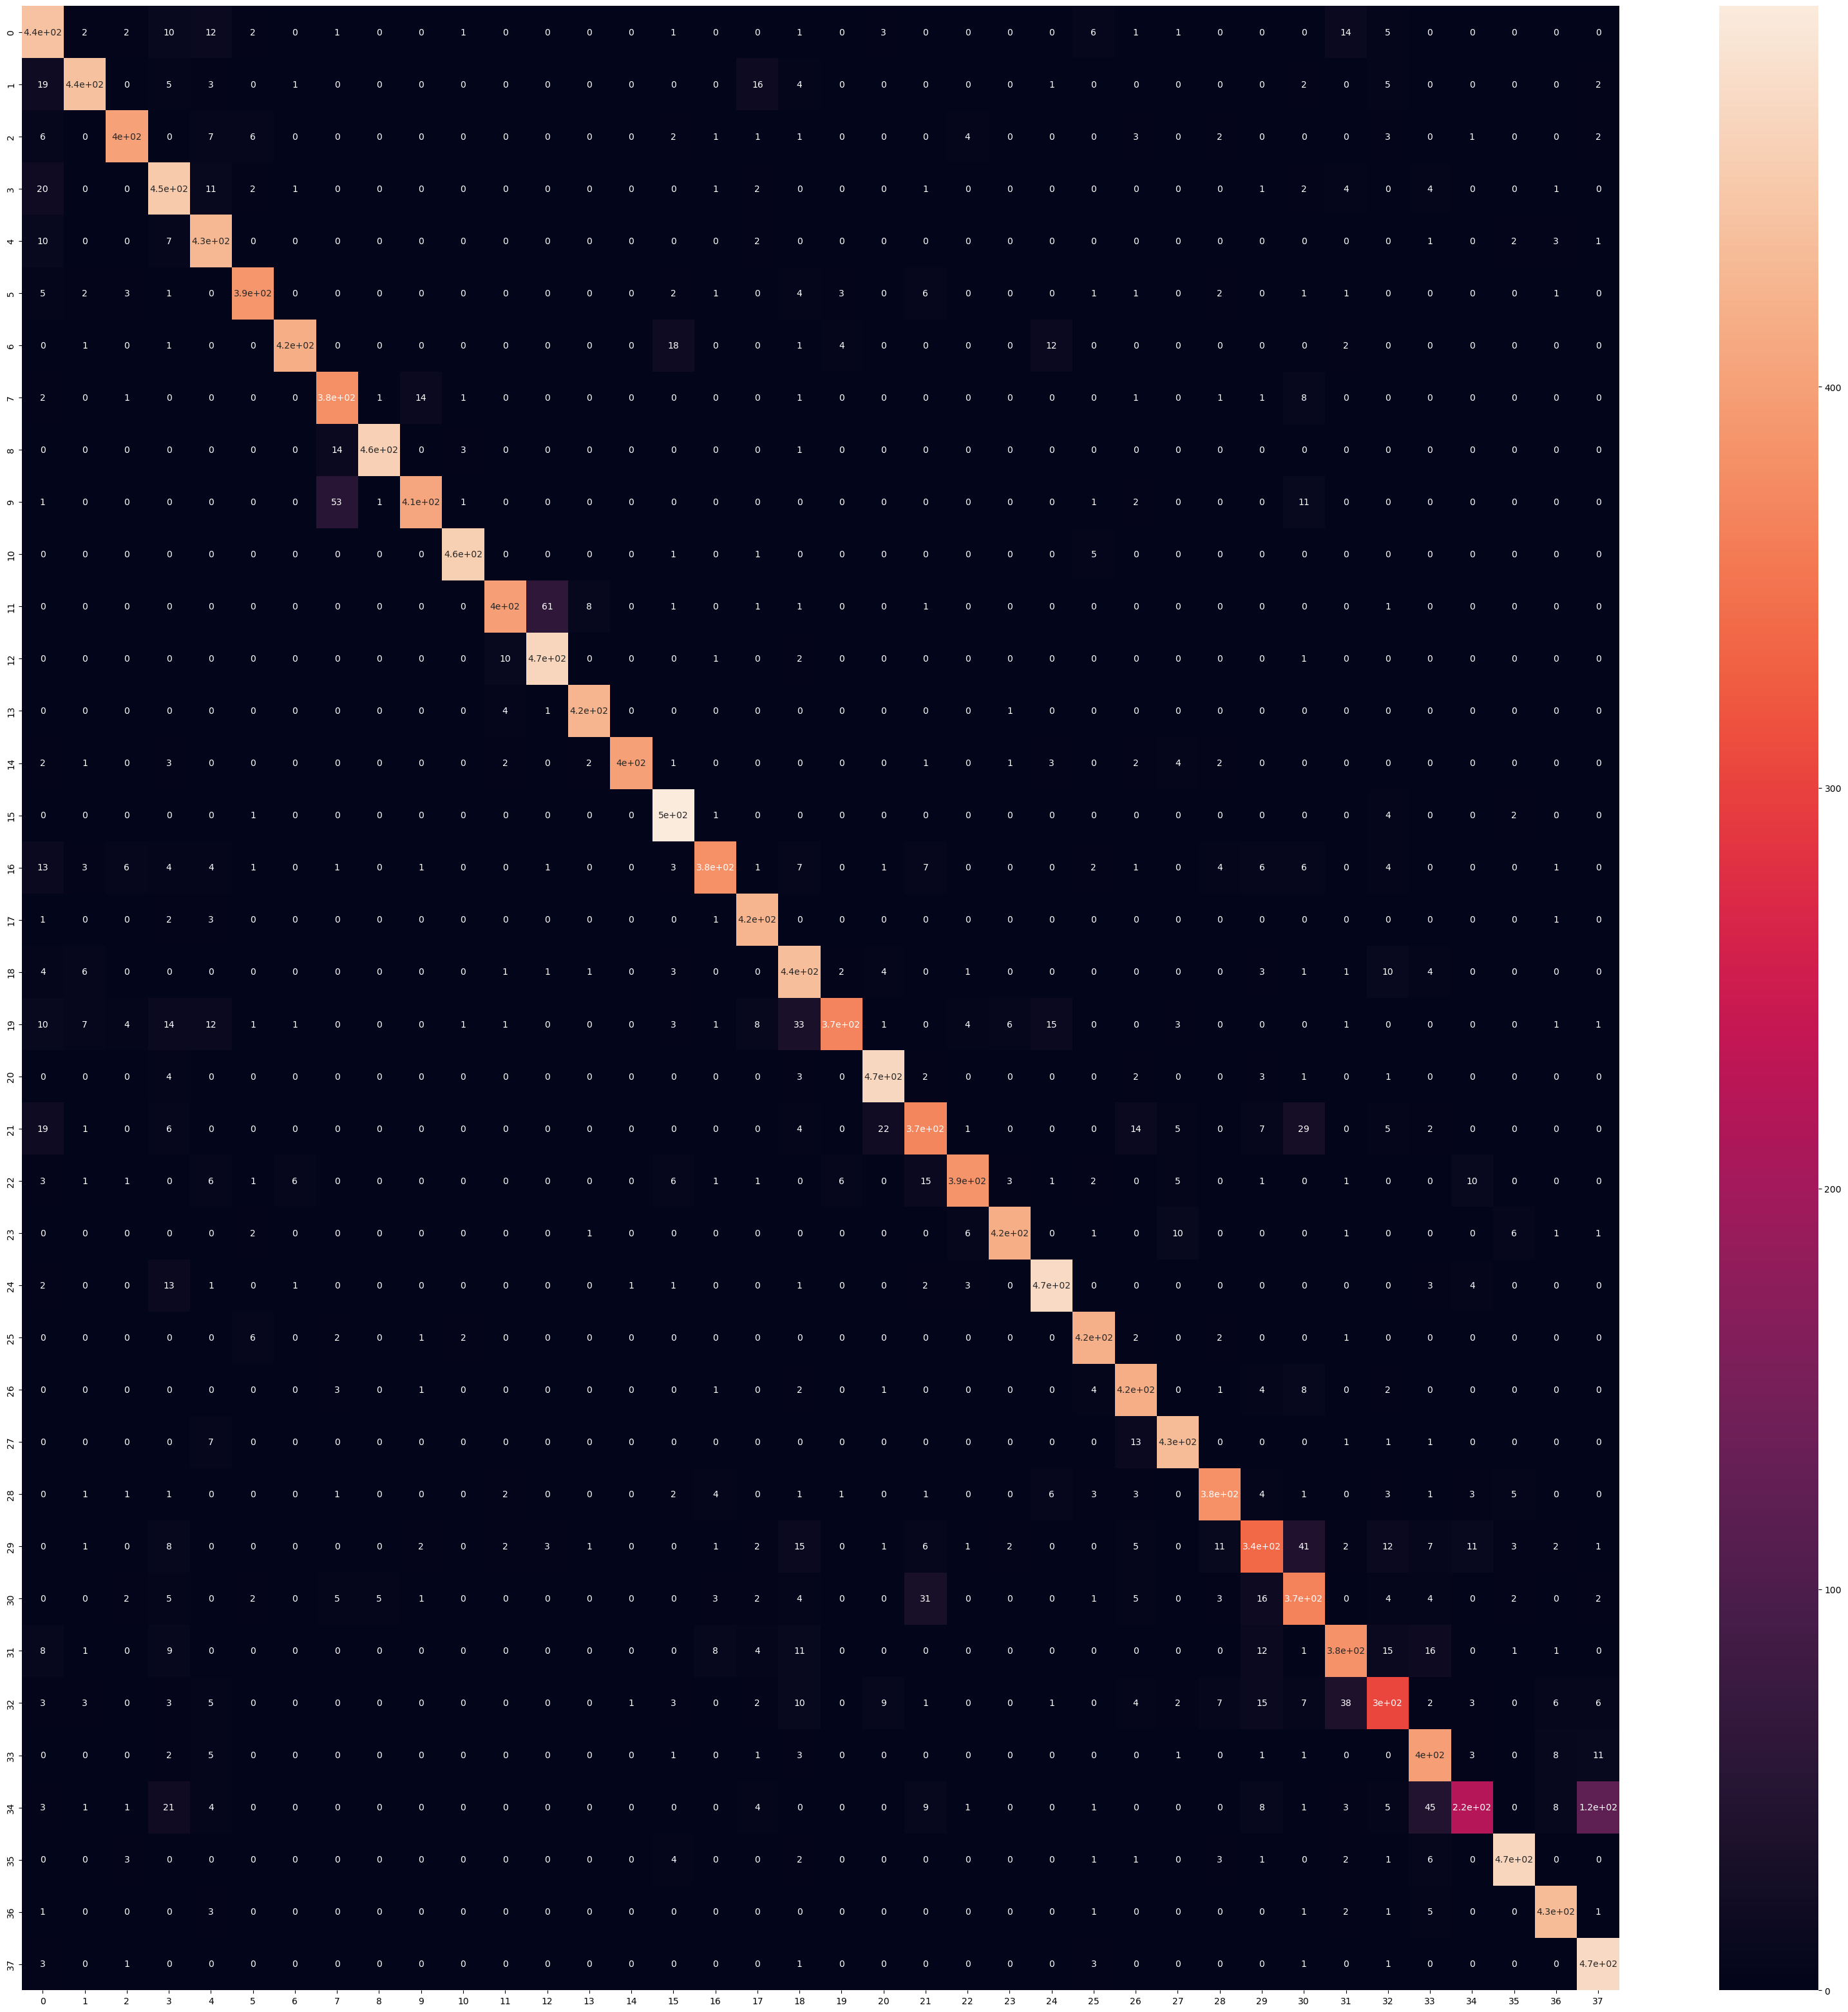

In [141]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True)

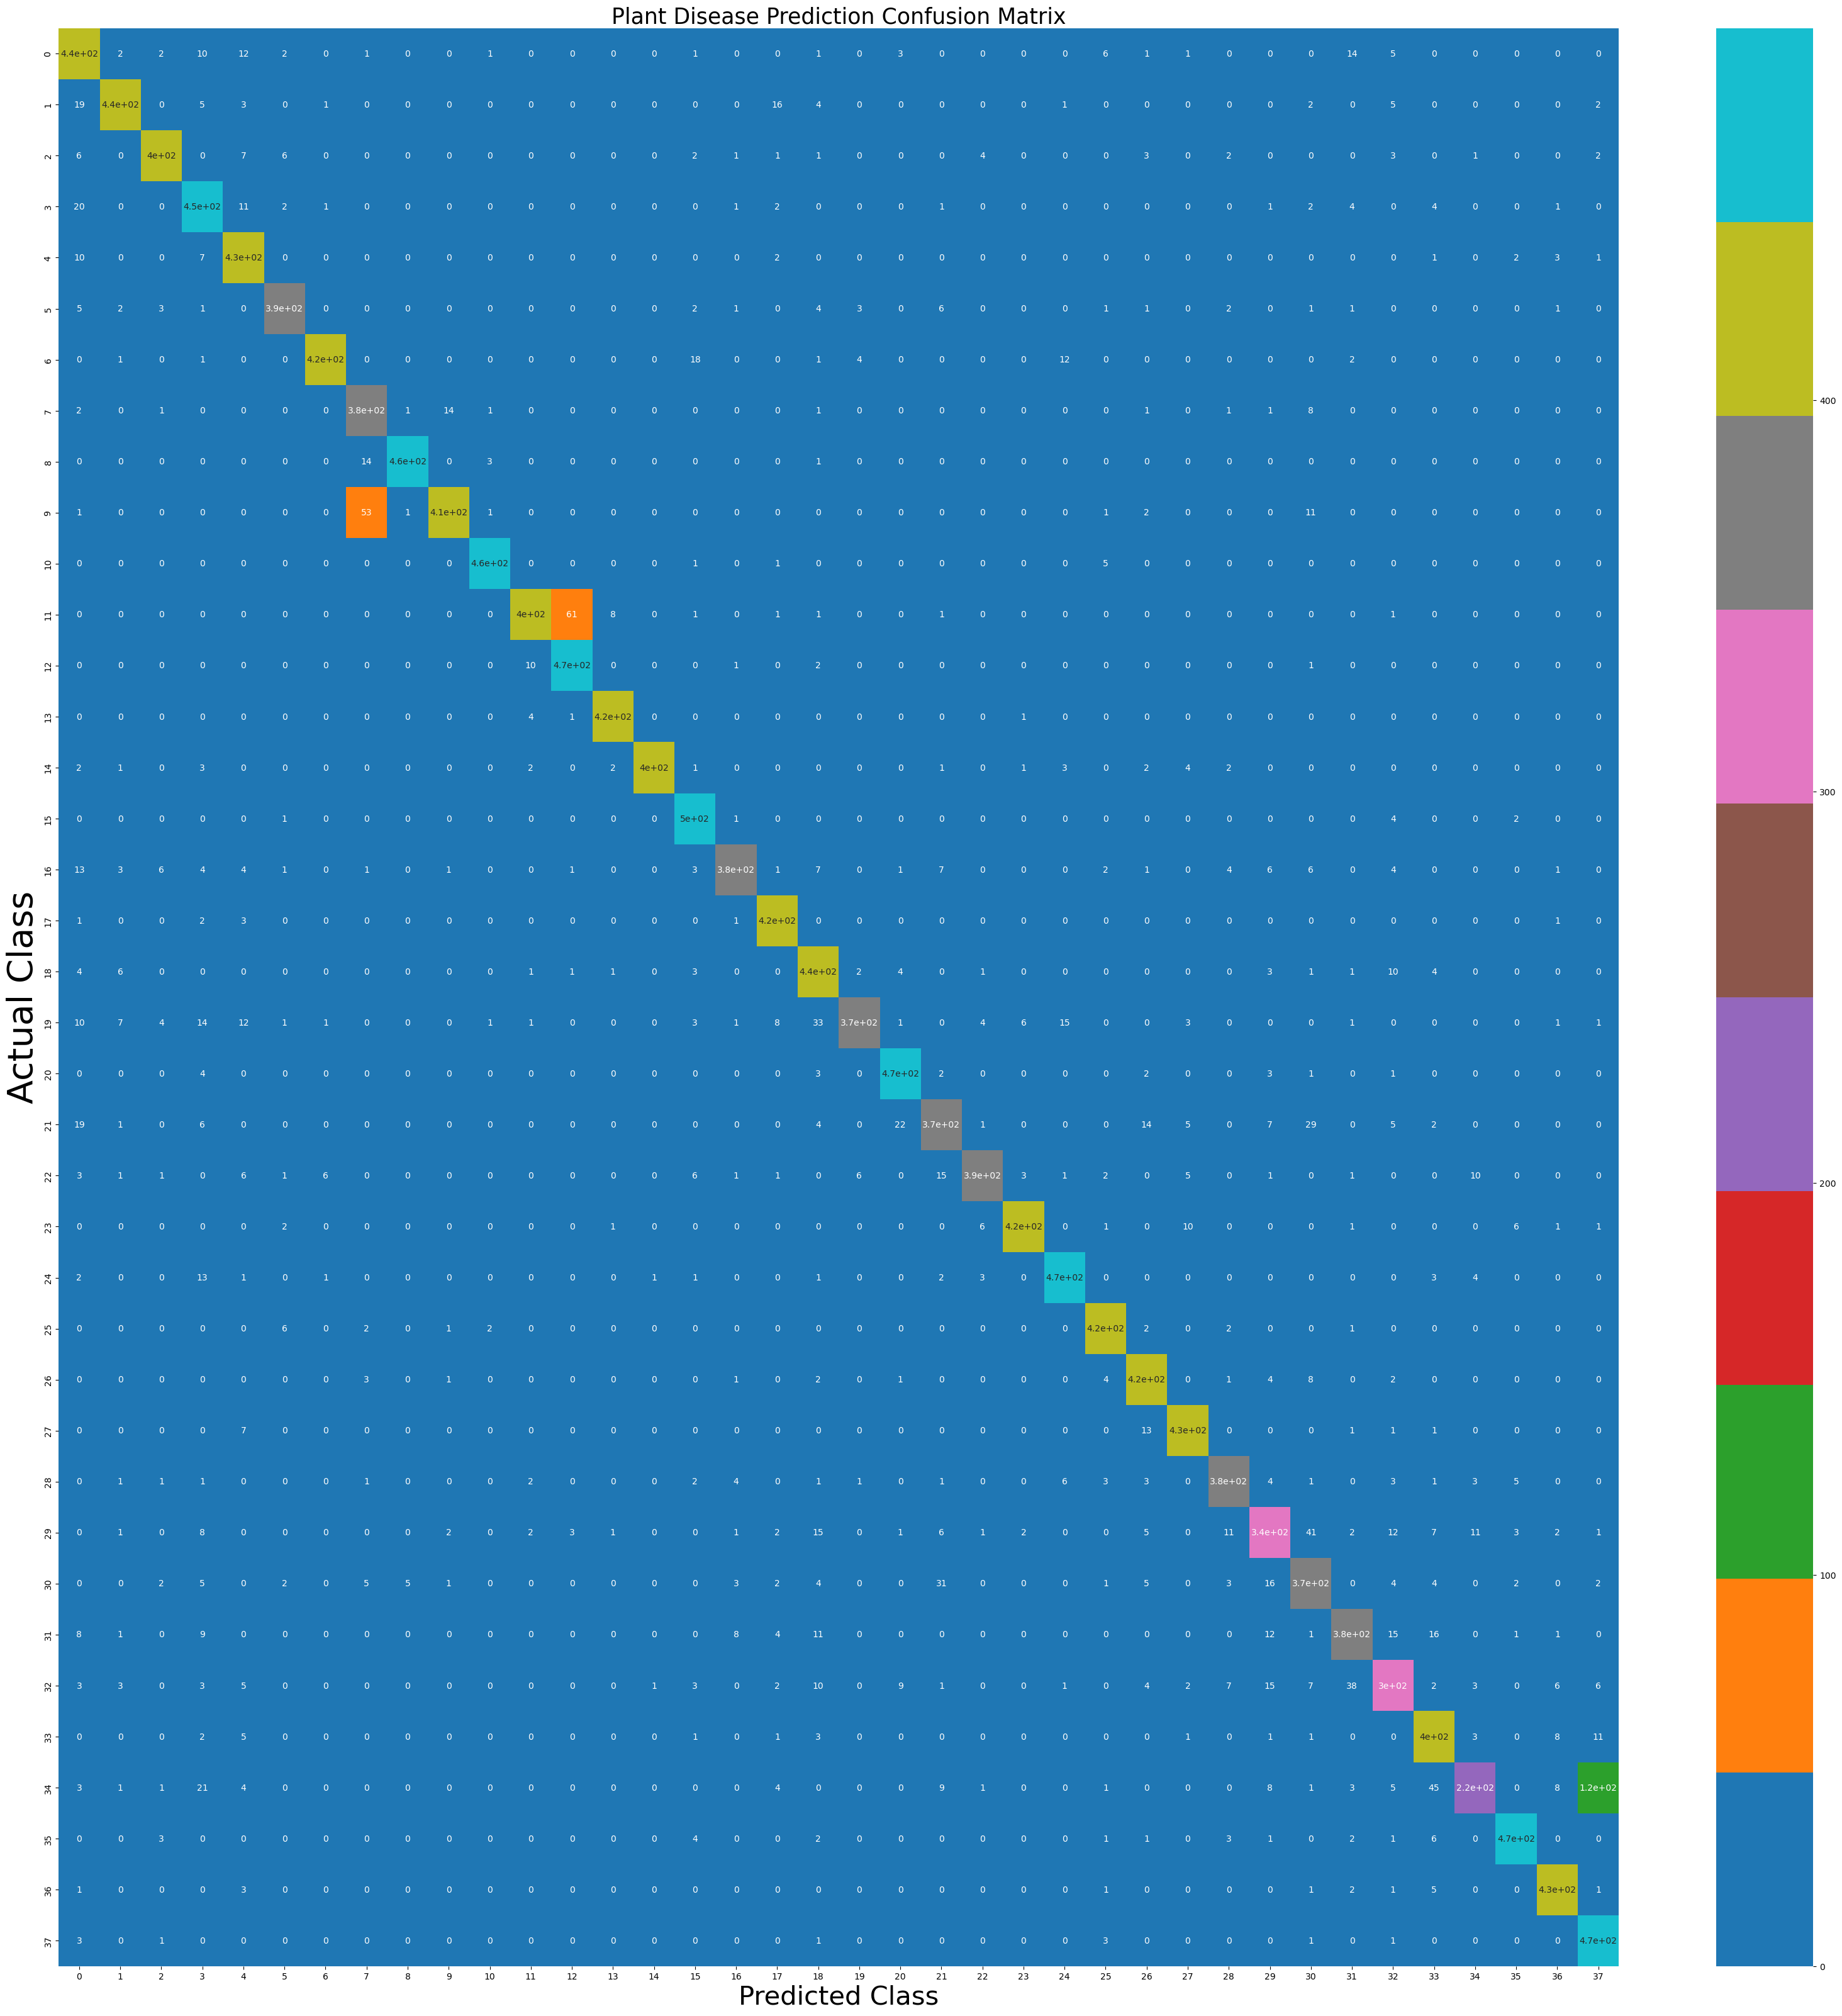

In [143]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10}, cmap='tab10')

plt.xlabel('Predicted Class',fontsize = 30)
plt.ylabel('Actual Class',fontsize = 40)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()